In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import (StandardScaler, PowerTransformer)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix

### Data Overview

In [2]:
df = pd.read_csv('./liver_cirrhosis_stage/liver_cirrhosis.csv')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


### Data Analysis

In [3]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [4]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

N_Days: 549 unique values
Status: 3 unique values
Drug: 2 unique values
Age: 510 unique values
Sex: 2 unique values
Ascites: 2 unique values
Hepatomegaly: 2 unique values
Spiders: 2 unique values
Edema: 3 unique values
Bilirubin: 113 unique values
Cholesterol: 220 unique values
Albumin: 179 unique values
Copper: 197 unique values
Alk_Phos: 336 unique values
SGOT: 240 unique values
Tryglicerides: 157 unique values
Platelets: 295 unique values
Prothrombin: 51 unique values
Stage: 3 unique values


In [5]:
temp_df = df.copy()

In [6]:
#converting categorical data to numeric data for analysis
cat_cols = temp_df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

x = OrdinalEncoder().fit_transform(temp_df[cat_cols])
new = pd.DataFrame(x, columns=cat_cols)
for col in new.columns:
    print(f"{col}: {new[col].nunique()} unique values")#the number of unique values are preserved 
    df[col] = new[col]

df

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')
Status: 3 unique values
Drug: 2 unique values
Sex: 2 unique values
Ascites: 2 unique values
Hepatomegaly: 2 unique values
Spiders: 2 unique values
Edema: 3 unique values


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0.0,1.0,18499,0.0,0.0,1.0,0.0,0.0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,0.0,1.0,19724,1.0,1.0,0.0,1.0,0.0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,0.0,1.0,11839,0.0,0.0,0.0,0.0,0.0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,2.0,1.0,16467,0.0,0.0,0.0,0.0,0.0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,2.0,1.0,21699,0.0,0.0,1.0,0.0,0.0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2.0,0.0,23612,0.0,0.0,0.0,0.0,0.0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,2.0,0.0,23612,0.0,0.0,0.0,0.0,0.0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,2.0,0.0,16736,0.0,0.0,1.0,1.0,2.0,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,0.0,0.0,16990,0.0,0.0,1.0,0.0,0.0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


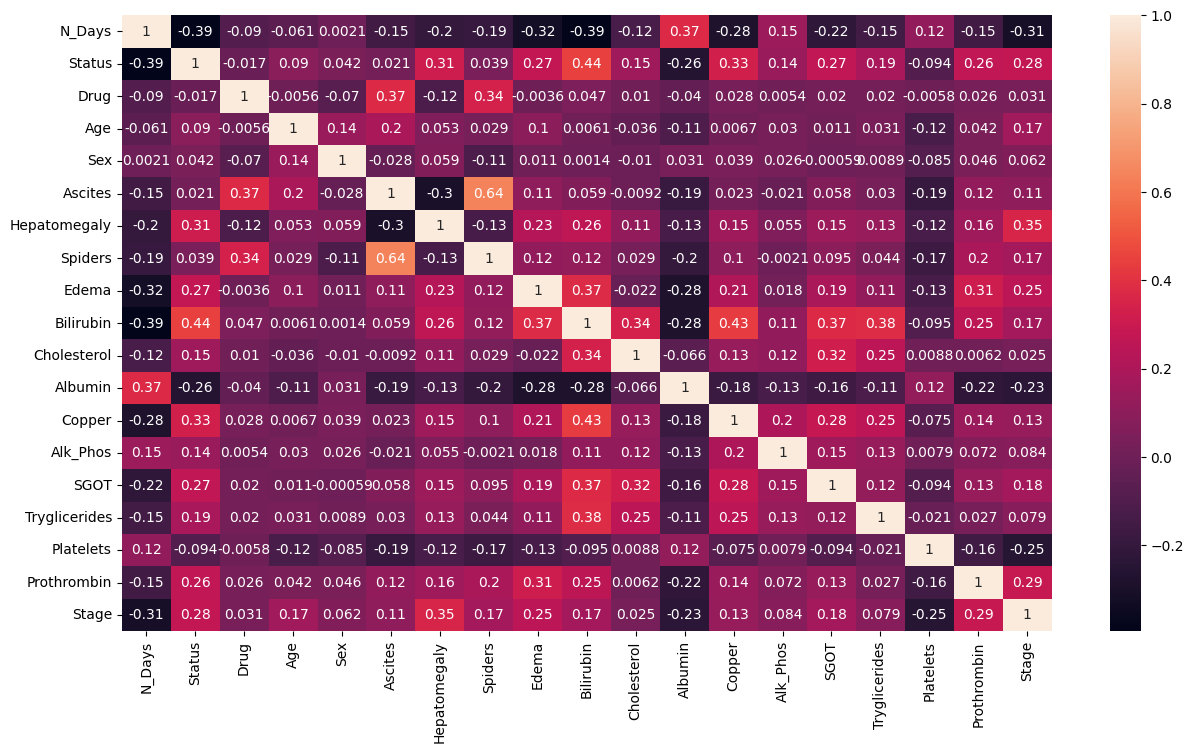

In [7]:
#now using heatmap to see correlation
# correlation heatmap 
plt.figure(figsize=(15, 8))   # width=12, height=8
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

IndexError: index 18 is out of bounds for axis 0 with size 18

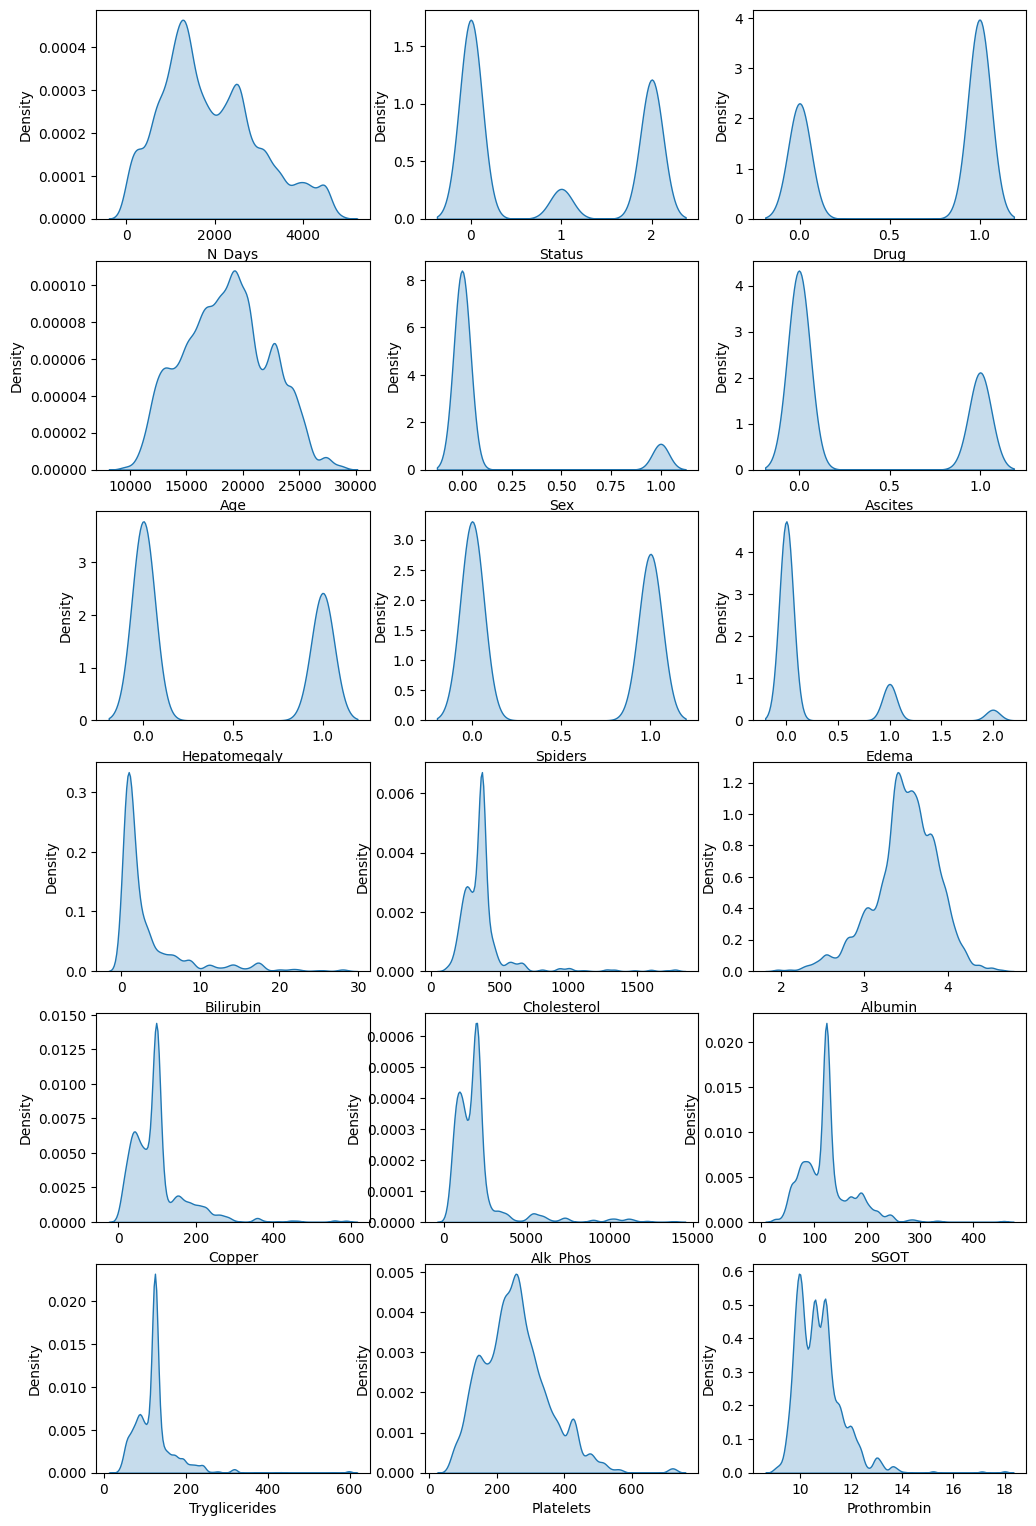

In [8]:
# skewness check of individual features

# Number of features
features = df.columns
n_features = len(features)

# Create subplots (2 columns layout)
fig, axes = plt.subplots((n_features + 1)//3, 3, figsize=(12, 3*n_features//3))
axes = axes.flatten()  # Flatten 2D axes array into 1D for easy indexing

# Loop through features
for i, col in enumerate(features):
    sns.kdeplot(df[col], fill=True, ax=axes[i])
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data preprocessing

In [9]:
X = df.drop('Stage', axis=1)
y = df['Stage']

In [10]:
# test-train splitiing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 18)
(5000, 18)
(20000,)
(5000,)


In [11]:
#check for missing values
X_train.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [12]:
# check for duplicate rows
len(df) - len(df.duplicated(subset=None, keep='first'))

0

In [13]:
# Define our pipeline of transformations to apply and in what order
pipe = Pipeline([('transfomer', PowerTransformer(method='yeo-johnson')),
                ('scaler', StandardScaler())])

In [14]:
numeric_pipe = pipe.fit(X_train)
numeric_pipe.transform(X_train)

array([[ 0.84381246, -0.91287837,  0.7574219 , ...,  0.09906757,
        -0.21959959, -0.1123931 ],
       [ 0.8903117 , -0.91287837,  0.7574219 , ..., -0.89919886,
         2.01629065, -0.90387445],
       [-0.4863527 , -0.91287837,  0.7574219 , ...,  0.22609427,
        -0.14362314, -0.1123931 ],
       ...,
       [-0.16363766, -0.91287837, -1.32026813, ...,  0.22609427,
         0.62301915, -1.91666322],
       [-1.14107869,  1.17460519,  0.7574219 , ...,  0.22609427,
         0.4761449 ,  0.39899213],
       [ 0.03024041, -0.91287837, -1.32026813, ..., -0.67169725,
         0.69475039, -0.90387445]], shape=(20000, 18))

### Cross-validation setup

In [15]:
# Stratified KFold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Hyperparameter Tuning

In [16]:
# Base LightGBM model
lgb_clf = lgb.LGBMClassifier(random_state=42)

In [17]:
# Hyperparameter grid
param_dist = {
    "num_leaves": [31, 50, 70, 100],
    "max_depth": [-1, 10, 20, 30],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [200, 500, 1000],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

In [18]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,   # number of parameter settings sampled
    scoring=make_scorer(accuracy_score),
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [19]:
# Fit
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1980
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 18
[LightGBM] [Info] Start training from score -1.107451
[LightGBM] [Info] Start training from score -1.087079
[LightGBM] [Info] Start training from score -1.101416
Best parameters: {'subsample': 0.9, 'num_leaves': 70, 'n_estimators': 500, 'max_depth': 30, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best CV accuracy: 0.9640000000000001


### Final Model Training

In [20]:
pipeline = Pipeline([
    ("var_thresh", VarianceThreshold(threshold=0.01)),         # low variance filter
    ("select_best", SelectKBest(score_func=f_classif, k=35)),  # univariate selection
    ("clf", lgb.LGBMClassifier(**random_search.best_params_, random_state=42))
])

# Fit best model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\muska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=35 is greater than n_features=18. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1980
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 18
[LightGBM] [Info] Start training from score -1.107451
[LightGBM] [Info] Start training from score -1.087079
[LightGBM] [Info] Start training from score -1.101416
Test Accuracy: 0.9678

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96      1657
           2       0.95      0.97      0.96      1697
           3       0.98      0.98      0.98      1646

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


Confusion Matrix:
 [[1582   58   17]
 [  30 1648   19]
 [  16   21 1609]]


C:\Users\muska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
